# Gaussian Naive Bayes

In [235]:
import pandas as pd
from scipy.stats import norm

class GNB:
  def __predict(self, x):
    probabilities = {}

    for label in self.labels:
      label_stats = self.posterior_matrix[label]
      final_prob = 1

      for feat_name in self.feature_names:
        feat_x = x[feat_name]
        mean = label_stats[feat_name]['mean']
        std = label_stats[feat_name]['std']
        dist = norm(mean, std)
        prob = dist.pdf(feat_x)
        final_prob = final_prob * prob

      probabilities[label] = final_prob
    
    high = 0
    best_label = 'error'

    for key, value in probabilities.items():
      if value > high:
        high = value
        best_label = key
        
    return best_label
  
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

    self.labels = y_train.iloc[:, 0].unique()

    self.feature_names = X_train.columns.tolist()
    self.labels_name = y_train.columns.tolist()[0]

    # Recontatenando o as features com as labels para fazer a filtragem depois
    df = pd.concat([X_train, y_train], axis=1)
    
    self.posterior_matrix = {}

    for label in self.labels:
      filtered_features = df[ df[self.labels_name] == label ]
      description = filtered_features.describe()
      stats = description.head(3).iloc[1: , :]
      self.posterior_matrix[label] = stats
  
  def predict(self, X):
    results = []
    for _, row in X.iterrows():
      results.append(self.__predict(row))

    return results
    

  

# Data
## The Pygoscelis Dataset
The genus Pygoscelis ("rump-legged") contains three living species of penguins collectively known as "brush-tailed penguins".
- Pygoscelis adeliae (Adélie penguin)
- Pygoscelis antarctica (Chinstrap penguin)
- Pygoscelis papua (Gentoo penguin)

<!-- <img src="resources/Adelie_Penguin.jpg" alt="Adélie penguin" title="Pygoscelis adeliae" /> -->

In [236]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("penguins.csv")
df = df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Species']]
df = df.dropna()

X = df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
y = df[['Species']]

## Train-test splitting

In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Minor testing

In [238]:
df = pd.concat([X_test, y_test], axis=1)

sample = df.sample()
display(sample)

sample_label = sample.iat[0,4]
display(sample_label)

sample_feats = sample[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Species']]

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Species
1,39.5,17.4,186.0,3800.0,Adelie Penguin (Pygoscelis adeliae)


'Adelie Penguin (Pygoscelis adeliae)'

In [239]:
gnb = GNB()
gnb.fit(X_train, y_train)


In [240]:
from sklearn.metrics import classification_report

y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.93      0.98      0.96        44
Chinstrap penguin (Pygoscelis antarctica)       0.96      0.88      0.92        25
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        34

                                 accuracy                           0.96       103
                                macro avg       0.96      0.95      0.96       103
                             weighted avg       0.96      0.96      0.96       103



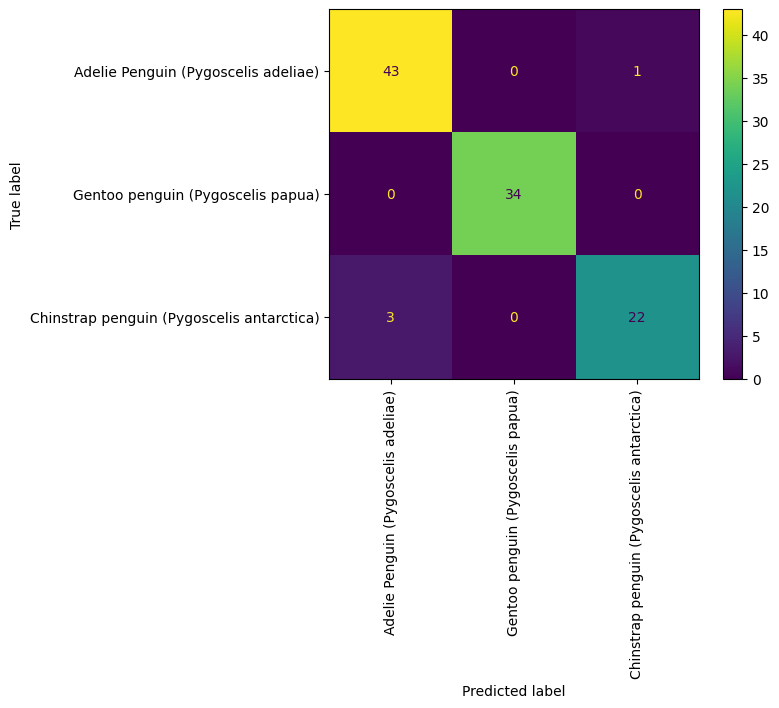

In [242]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=df['Species'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Species'].unique())
disp.plot(xticks_rotation='vertical')
plt.show()

# TESTING 

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

X_colnames = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
y_colname = 'Species'

label_categories = df[y_colname].unique()
display(label_categories)

In [ ]:
# pdf = stats.norm.pdf(data, loc=loc, scale=scale)
# from scipy.stats import norm
# print(norm.cdf(x, mean, std))
# data = X['Culmen Length (mm)']
# mean = data.mean()
# var = data.var()


debug = False

posterior_matrix = {}

for label in label_categories:
    species_filtered = df[ df['Species'] == label ]
    species_filtered_desc = species_filtered.describe()
    species_filtered_stats = species_filtered_desc.head(3).iloc[1: , :]
    posterior_matrix[label] = species_filtered_stats

    if debug:
        print(label)
        display(species_filtered)
        display(species_filtered_desc)
        display(species_filtered_stats)
        print('------------------------------------------------')

# display(posterior_matrix)

# probabilities = [dist.pdf(value) for value in data]


In [ ]:



# display(stats_dict['Adelie Penguin (Pygoscelis adeliae)']['Culmen Length (mm)']['mean'])

mean = posterior_matrix['Adelie Penguin (Pygoscelis adeliae)']['Culmen Length (mm)']['mean']
std = posterior_matrix['Adelie Penguin (Pygoscelis adeliae)']['Culmen Length (mm)']['std']
# display(mean)
# display(std)

culmen_length = 46.5
culmen_depth = 17.9

dist = norm(mean, std)
# display(dist.pdf(culmen_length))

specimen = {'Culmen Length (mm)': 46.5, 'Culmen Depth (mm)': 17.9, 'Flipper Length (mm)': 192.0, 'Body Mass (g)': 3500 }

species_prob = {}

for label in label_categories:
  species_table = posterior_matrix[label]
  final_prob = 1

  for feat_name in X_colnames:
    specimen_feat = specimen[feat_name]
    mean = species_table[feat_name]['mean']
    std = species_table[feat_name]['std']
    dist = norm(mean, std)
    prob = dist.pdf(specimen_feat)
    final_prob *= prob

  species_prob[label] = final_prob


# display(species_prob)

